<a href="https://colab.research.google.com/github/antmaio/Creactif_Fastai/blob/main/Fastai_Seance3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fastai pour le traitement d'images

In [1]:
from fastai.vision.all import *

1. Importation de la base de données

  a) Base de données publique sur le web (note: tar = données compressées (équivalent à zip))


In [2]:
chemin_donnees = untar_data(URLs.PETS) #checker les autres databases dispo
print(chemin_donnees.ls())

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'), Path('/root/.fastai/data/oxford-iiit-pet/images')]


Il y a 2 dossiers qui ont été téléchargés: "annotations" et "images"

On veut utiliser les images (pas les annotations)

In [110]:
fichiers = get_image_files(chemin_donnees/"images")
print(type(fichiers))
print(type(fichiers[0]))
print(type(str(fichiers[0])))
print(fichiers[0])
print(fichiers.items[0])
print(str(fichiers[0]))

print("subpaths:")
print(fichiers[0].parent)
print(fichiers[0].suffix)
print(fichiers[0].name)

<class 'fastcore.foundation.L'>
<class 'pathlib.PosixPath'>
<class 'str'>
/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_134.jpg
/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_134.jpg
/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_134.jpg
subpaths:
/root/.fastai/data/oxford-iiit-pet/images
.jpg
Abyssinian_134.jpg


Le type de données "L" est une liste adaptée aux fonctions de fastai.

Pour connaitre tous les arguments possibles d'une variable, utiliser "dir"

In [ ]:
f = fichiers[0]
dir(f)

  b) Fichiers stockés dans le PC

In [38]:
# téléchargement d'une image web
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/1216px-June_odd-eyed-cat_cropped.jpg 
# récupérer le nom des fichiers correspondant à des images dans le dossier courant
import glob
mes_images = glob.glob("./*.jpg")
print("les images s'appellent: ", mes_images)

les images s'appellent:  ['./1216px-June_odd-eyed-cat_cropped.jpg']


In [44]:
print(mes_images)
print(mes_images[0])
print(type(mes_images))
print(type(mes_images[0]))

['./1216px-June_odd-eyed-cat_cropped.jpg']
./1216px-June_odd-eyed-cat_cropped.jpg
<class 'list'>
<class 'str'>


  c) Images au sein de l'environnement

In [40]:
from torchvision.io import read_image
mon_image = mes_images[0]
im = read_image(mon_image)
print(im.shape)

torch.Size([3, 1024, 1216])


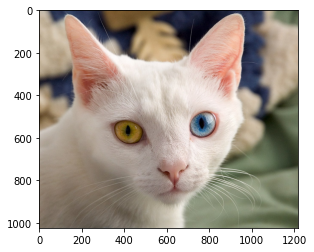

In [43]:
from matplotlib import pyplot as plt
plt.imshow(im.permute(1,2,0))
# check la doc

# Exercices

1. Afficher "mon image" en nuances de gris
2. Afficher la 10ème image de la base de donnée "cifar"

# 2. Définition des labels (catégories)

Explorer les noms de fichiers

In [55]:
for i in range(10):
  print(fichiers[i].name)


Abyssinian_134.jpg
pomeranian_106.jpg
Ragdoll_182.jpg
Maine_Coon_26.jpg
english_cocker_spaniel_55.jpg
Abyssinian_100.jpg
american_bulldog_15.jpg
Ragdoll_16.jpg
Bombay_2.jpg
pomeranian_160.jpg


Ici, les races de chiens sont écrites avec une minuscule et les races de chat avec une Majuscule

**Exercice 3** : Trouver une fonction qui permet de trier chat/chien

In [59]:
# votre code
def label_func(f): 
  name = f.name
  return name[0].isupper()

**Exercice 4** : Créer un vecteur "cat" qui contient 0 pour tous les indices correspondant à un chien et 1 pour ceux correspondant à un chat.

In [63]:
#votre code
cat = np.zeros(len(fichiers))
print(cat.shape)
for idx,item in enumerate(fichiers):
  cat[idx] = label_func(item)

# vérification
for i in range(10):
  print(cat[i], ' ', fichiers[i].name)

(7390,)
1.0   Abyssinian_134.jpg
0.0   pomeranian_106.jpg
1.0   Ragdoll_182.jpg
1.0   Maine_Coon_26.jpg
0.0   english_cocker_spaniel_55.jpg
1.0   Abyssinian_100.jpg
0.0   american_bulldog_15.jpg
1.0   Ragdoll_16.jpg
1.0   Bombay_2.jpg
0.0   pomeranian_160.jpg


## 3. Séparation des données

On veut "splitter" les données en une partie entraînement et une partie validation.

Entraînement : partie des données utilisée pour mettre à jour les paramètres du modèle

Validation : partie des données utilisée pour s'assurer que le modèle est capable de généraliser la tâche à des données inconnues

Fonctions de fastai utiles : IndexSplitter et RandomSplitter

In [79]:
n_donnees_train = int(len(fichiers)*0.80)
splits = (L(range(n_donnees_train), use_list=True),
          L(np.arange(n_donnees_train, len(fichiers)), use_list=True))
print("splits: ")
print(np.shape(splits))
print(splits[0])
print(splits[1])

splitter = IndexSplitter(splits[1])
print("splitter: ")
print(splitter)

splits: 
(2,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

## 4. Entrer les données dans le modèle

La classe "[DataBlock](https://docs.fast.ai/data.block.html)" nous permet de définir la structure des données à charger. ([code source](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L81))

In [113]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=splitter)

La fonction "[dataloaders](https://github.com/fastai/fastai/blob/master/fastai/data/block.py)", interne à DataBlock, permet de définir comment les données seront entrées dans le modèle au moment de l'entraînement.

In [114]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=8) # bs = batch size
dls.show_batch() #note: show_batch() affiche 12 images au maximum

RuntimeError: ignored

**Exercice 5** :

Créer un loader (PETS data) qui split les données de manière aléatoire (70% train, 30% validation) pour obtenir une input de shape (4, 3, 440, 500)

In [112]:
# votre code
splitter = RandomSplitter(valid_pct=0.3)
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=splitter)
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=4)
dls.show_batch()

RuntimeError: ignored

In [ ]:
# getters = [get_image_files, ItemGetter(1)]
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y = label_func,
                 splitter=RandomSplitter(),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))